In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF United Kingdom,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern Double Room Echo ', ' Stayed 3 nights ', ' Submit...",289 day,48.845377,2.325643


In [150]:
hotels['reviewer_score'].nunique()

37

In [151]:
hotels['additional_number_of_scoring'].nunique()

480

In [26]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [71]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_day_of_week'] = hotels['review_date'].dt.day_of_week
hotels['review_month'] = hotels['review_date'].dt.month
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,review_day_of_week,review_month
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,4,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,3,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1,10
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1,9
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,5,3


In [72]:
# создадим новый признак страны
hotels['country'] = hotels['hotel_address'].apply(lambda x: x.split()[-1]\
                                            if x.split()[-1] != 'Kingdom'\
                                                    else ' '.join(x.split()[-2:]))
# создадим новый признак города 
hotels['city'] = hotels['hotel_address'].apply(lambda x: x.split()[-2]\
                                         if x.split()[-1] != 'Kingdom'\
                                         else x.split()[-5])

<Axes: ylabel='hotel_address'>

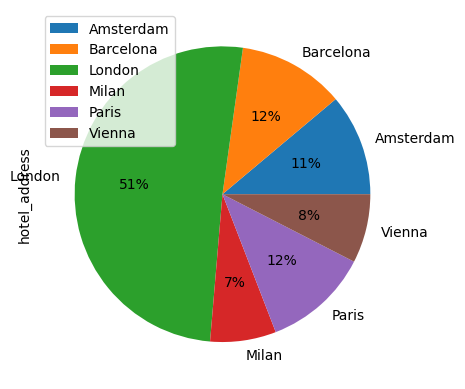

In [148]:
hotels.groupby(['city']).count().plot( 
    kind='pie', y = 'hotel_address', autopct='%1.0f%%') 

In [73]:
hotels_double = hotels.copy()
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,review_day_of_week,review_month,country,city
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,4,2,United Kingdom,London
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,3,1,United Kingdom,London
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1,10,France,Paris
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1,9,France,Paris
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,5,3,Netherlands,Amsterdam


In [31]:
# Подсчитаем частотность значений в колонке tags
# для этого сначала составим словарь из всех возможных значений поля tags, а затем подсчитаем, сколько этих значений максимально в одной ячейке

tags_collection = []
tags_count = {}
tags_figure = 0

def count_tags(tags, tags_figure):
    # очищаем поле tags от "мусора"
    tags = tags.replace('[', '')
    tags = tags.replace(']', '')
    tags = tags.replace("'", '')
    tags_list = tags.split(',')
    f = len(tags_list)
    # Добавляем элемент в список, если его там еще нет
    for el in tags_list:
        if el.strip() in tags_collection:
            tags_count[el.strip()] += 1
        else:
            tags_collection.append(el.strip())
            tags_count[el.strip()] = 1
    # Определяем максимальный размер списка тэгов в одной ячейке
    if f > tags_figure:
        return f
    else:
        return tags_figure       
  
# Считаем максимальное количество тэгов в одной ячейке и заодно заполняем список уникальных тэгов
tags_figure = hotels['tags'].apply(lambda x: count_tags(x, tags_figure))

print(f'Max tags count for 1 cell = {tags_figure.max()}')
print(f'Count of unique tags = {len(tags_collection)}')
tags_count = {k: v for k, v in sorted(tags_count.items(), key = lambda item: item[1], reverse = True)}
print(tags_count)



Max tags count for 1 cell = 6
Count of unique tags = 2368
{'Leisure trip': 313593, 'Submitted from a mobile device': 230778, 'Couple': 189212, 'Stayed 1 night': 145373, 'Stayed 2 nights': 100263, 'Solo traveler': 81235, 'Stayed 3 nights': 72000, 'Business trip': 61989, 'Group': 49088, 'Family with young children': 45836, 'Stayed 4 nights': 35748, 'Double Room': 26386, 'Standard Double Room': 24151, 'Superior Double Room': 23550, 'Family with older children': 19802, 'Deluxe Double Room': 18623, 'Double or Twin Room': 16824, 'Stayed 5 nights': 15611, 'Standard Double or Twin Room': 13062, 'Classic Double Room': 12716, 'Superior Double or Twin Room': 10238, '2 rooms': 9287, 'Stayed 6 nights': 7399, 'Standard Twin Room': 7325, 'Single Room': 7227, 'Twin Room': 6279, 'Stayed 7 nights': 5549, 'Executive Double Room': 4763, 'Classic Double or Twin Room': 4576, 'Superior Twin Room': 4540, 'Club Double Room': 4485, 'Deluxe Double or Twin Room': 4465, 'Queen Room': 4071, 'Deluxe King Room': 3993

In [93]:
def extract_trip(tags):
    tags = tags.replace('[', '')
    tags = tags.replace(']', '')
    tags = tags.replace("'", '')
    tags_list = tags.split(',')
    for el in tags_list:
        if 'trip' in el:
            return el.strip()
    return 'Not a trip'

hotels_double['trip'] = hotels_double['tags'].apply(extract_trip)
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,lat,lng,review_day_of_week,review_month,country,city,trip,nights
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,4,2,United Kingdom,London,Leisure trip,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,3,1,United Kingdom,London,Business trip,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1,10,France,Paris,Leisure trip,3
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1,9,France,Paris,Leisure trip,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,5,3,Netherlands,Amsterdam,Business trip,6


In [107]:
trips = pd.get_dummies(hotels_double['trip'])
for col in trips.columns:
    trips[col] = trips[col].apply(lambda x: 1 if x else 0)
trips.head()

,Business trip,Leisure trip,Not a trip
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [108]:
hotels_double = pd.concat([hotels_double, trips], axis = 1, join = 'inner')
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lng,review_day_of_week,review_month,country,city,trip,nights,Business trip,Leisure trip,Not a trip
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,-0.143671,4,2,United Kingdom,London,Leisure trip,2,0,1,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,-0.123097,3,1,United Kingdom,London,Business trip,1,1,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,2.325643,1,10,France,Paris,Leisure trip,3,0,1,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,2.394540,1,9,France,Paris,Leisure trip,1,0,1,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,4.847060,5,3,Netherlands,Amsterdam,Business trip,6,1,0,0


In [109]:
hotels_double = hotels_double.drop('trip', axis = 1)
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,review_day_of_week,review_month,country,city,nights,Business trip,Leisure trip,Not a trip
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,51.507894,-0.143671,4,2,United Kingdom,London,2,0,1,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,51.521009,-0.123097,3,1,United Kingdom,London,1,1,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,48.845377,2.325643,1,10,France,Paris,3,0,1,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,48.888697,2.394540,1,9,France,Paris,1,0,1,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,52.385601,4.847060,5,3,Netherlands,Amsterdam,6,1,0,0


In [92]:
import re

def extract_nights(tags):
    tags = tags.replace('[', '')
    tags = tags.replace(']', '')
    tags = tags.replace("'", '')
    tags_list = tags.split(',')
    for el in tags_list:
        if 'Stayed' in el:
            result = re.findall(r'\d+', el)
            return result[0]
    return 0

hotels_double['nights'] = hotels_double['tags'].apply(extract_nights)
hotels_double['nights'].value_counts()

nights
1     145373
2     100263
3      72000
4      35748
5      15611
6       7399
7       5549
8       1910
9        966
10       663
11       306
12       217
14       184
13       174
0        146
15        87
16        38
17        27
18        24
19        23
21        19
20        17
27        10
30        10
22         8
28         7
26         6
23         6
24         5
25         4
29         3
Name: count, dtype: int64

In [32]:
'''# Закодируем из ячейки tags 6 ячеек с тегами, в каждую из которых проставим уникальный номер соответствующего тэга
def return_tags(tags, position):
    #Очищаем тэги от мусора 
    tags = tags.replace('[', '')
    tags = tags.replace(']', '')
    tags = tags.replace("'", '')
    tags_list = tags.split(',')
    if position <= len(tags_list):
        # возвращаем порядковый номер тэга в общем списке тэгов
        return tags_collection.index(tags_list[position-1].strip())
    else:
        #если в списке меньше position тэгов, возвращаем значение по умолчанию
        return 3000
    
#Превращаем одну ячейку тэгов в 6

hotels_double['tag1'] = hotels_double['tags'].apply(lambda x: return_tags(x, 1))
hotels_double['tag2'] = hotels_double['tags'].apply(lambda x: return_tags(x, 2))
hotels_double['tag3'] = hotels_double['tags'].apply(lambda x: return_tags(x, 3))
hotels_double['tag4'] = hotels_double['tags'].apply(lambda x: return_tags(x, 4))
hotels_double['tag5'] = hotels_double['tags'].apply(lambda x: return_tags(x, 5))
hotels_double['tag6'] = hotels_double['tags'].apply(lambda x: return_tags(x, 6))

hotels_double.head()

 '''   

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,review_day_of_week,review_month,country,city,tag1,tag2,tag3,tag4,tag5,tag6
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,4,2,United Kingdom,London,0,1,2,3,4,3000
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,3,1,United Kingdom,London,5,1,6,7,3000,3000
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,1,10,France,Paris,0,8,9,10,4,3000
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,1,9,France,Paris,0,8,11,7,3000,3000
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,5,3,Netherlands,Amsterdam,5,1,12,13,3000,3000


In [110]:
hotels_double['local_reviewer'] = hotels_double.apply(lambda x: 1 if str(x['reviewer_nationality']).strip() == x['country'] else 0, axis=1)
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lng,review_day_of_week,review_month,country,city,nights,Business trip,Leisure trip,Not a trip,local_reviewer
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,-0.143671,4,2,United Kingdom,London,2,0,1,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,-0.123097,3,1,United Kingdom,London,1,1,0,0,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,2.325643,1,10,France,Paris,3,0,1,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,2.394540,1,9,France,Paris,1,0,1,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,4.847060,5,3,Netherlands,Amsterdam,6,1,0,0,0


In [111]:
def reduce_categories_number(df, col, n):
    '''
    Функция принимает датасет df, колонку col и n - количество наиболее частых категорий.
    Категории не входящие в n наиболее частых заменяются на 'Other'.
    Функция возвращает полученный датасет.
    '''
    popular_values = df[col].value_counts().nlargest(n).index
    df[col] = df[col].apply(lambda x: x if x in popular_values else 'Other')
    return df

hotels_double = reduce_categories_number(hotels_double, 'reviewer_nationality', 11)
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lng,review_day_of_week,review_month,country,city,nights,Business trip,Leisure trip,Not a trip,local_reviewer
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,-0.143671,4,2,United Kingdom,London,2,0,1,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,-0.123097,3,1,United Kingdom,London,1,1,0,0,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,Other,No kettle in room,6,406,No Positive,...,2.325643,1,10,France,Paris,3,0,1,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,2.394540,1,9,France,Paris,1,0,1,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Other,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,4.847060,5,3,Netherlands,Amsterdam,6,1,0,0,0


In [113]:
nationality = pd.get_dummies(hotels_double['reviewer_nationality'])
for col in nationality.columns:
    nationality[col] = nationality[col].apply(lambda x: 1 if x else 0)
nationality.head()

,Australia,Canada,France,Germany,Ireland,Netherlands,Saudi Arabia,Switzerland,United Arab Emirates,United Kingdom,United States of America,Other
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [114]:
hotels_double = pd.concat([hotels_double, nationality], axis = 1, join = 'inner')
hotels_double = hotels_double.drop('reviewer_nationality', axis = 1)
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,France,Germany,Ireland,Netherlands,Saudi Arabia,Switzerland,United Arab Emirates,United Kingdom,United States of America,Other
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,Leaving,3,1994,Staff were amazing,4,...,0,0,0,0,0,0,0,1,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,poor breakfast,3,1361,location,2,...,0,0,0,0,0,0,0,1,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,No kettle in room,6,406,No Positive,0,...,0,0,0,0,0,0,0,0,0,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,...,0,0,0,0,0,0,0,1,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,...,0,0,0,0,0,0,0,0,0,1


In [115]:
'''#преобразуем поля в категориальные и создадим из них новые столбцы, в которых будут цифры
hotels_double['hotel_name'] = pd.Categorical(hotels_double['hotel_name'])
hotels_double['reviewer_nationality'] = pd.Categorical(hotels_double['reviewer_nationality'])

hotels_double['city'] = pd.Categorical(hotels_double['city'])
hotels_double['country'] = pd.Categorical(hotels_double['country'])

hotels_double['h_name_cat'] = pd.factorize(hotels_double['hotel_name'])[0]
hotels_double['rev_nat_cat'] = pd.factorize(hotels_double['reviewer_nationality'])[0]

hotels_double['h_city_cat'] = pd.factorize(hotels_double['city'])[0]
hotels_double['h_country_cat'] = pd.factorize(hotels_double['country'])[0]
'''

hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,France,Germany,Ireland,Netherlands,Saudi Arabia,Switzerland,United Arab Emirates,United Kingdom,United States of America,Other
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,Leaving,3,1994,Staff were amazing,4,...,0,0,0,0,0,0,0,1,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,poor breakfast,3,1361,location,2,...,0,0,0,0,0,0,0,1,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,No kettle in room,6,406,No Positive,0,...,0,0,0,0,0,0,0,0,0,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,...,0,0,0,0,0,0,0,1,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,...,0,0,0,0,0,0,0,0,0,1


In [120]:
city = pd.get_dummies(hotels_double['city'])
for col in city.columns:
    city[col] = city[col].apply(lambda x: 1 if x else 0)
city.head()

,Amsterdam,Barcelona,London,Milan,Paris,Vienna
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


In [121]:
hotels_double = pd.concat([hotels_double, city], axis = 1, join = 'inner')
hotels_double = hotels_double.drop('city', axis = 1)
hotels_double.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,United Arab Emirates,United Kingdom,United States of America,Other,Amsterdam,Barcelona,London,Milan,Paris,Vienna
0,Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom,581,2016-02-19,8.4,The May Fair Hotel,Leaving,3,1994,Staff were amazing,4,...,0,1,0,0,0,0,1,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF United Kingdom,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,poor breakfast,3,1361,location,2,...,0,1,0,0,0,0,1,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,No kettle in room,6,406,No Positive,0,...,0,0,0,1,0,0,0,0,1,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris France,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,No Negative,0,607,Friendly staff quiet comfortable room spotlessly clean excellent location,11,...,0,1,0,0,0,0,0,0,1,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Torn sheets,4,7586,The staff was very friendly and helpful Breakfasts were just extraordinary Room was clean quiet...,20,...,0,0,0,1,1,0,0,0,0,0


In [125]:
pd.set_option(
    'display.max_columns', None
)
hotels_double.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   negative_review                             386803 non-null  object        
 6   review_total_negative_word_counts           386803 non-null  int64         
 7   total_number_of_reviews                     386803 non-null  int64         
 8   positive_review                             386803 non-null  object       

In [117]:
#Извлекаем числовой признак из колонки days_since_review
hotels_double['days_since_review'] = hotels_double['days_since_review'].apply(lambda x: int((str(x).replace(' day', '')).replace('s', '')))

In [126]:
#выбираем колонки для удаления

pd.set_option(
    'display.max_colwidth', 100
)

columns_for_delete = ['hotel_address', 'review_date', 'hotel_name', 'negative_review', 'positive_review', 'tags', 'country']
#создаем новый датасет для дальнейшей обработки его моделью
data_for_model = hotels_double.drop(columns=columns_for_delete, axis = 1)
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int64  
 8   lat                                         384355 non-null  float64
 9   lng                                         384355 non-null  float64
 

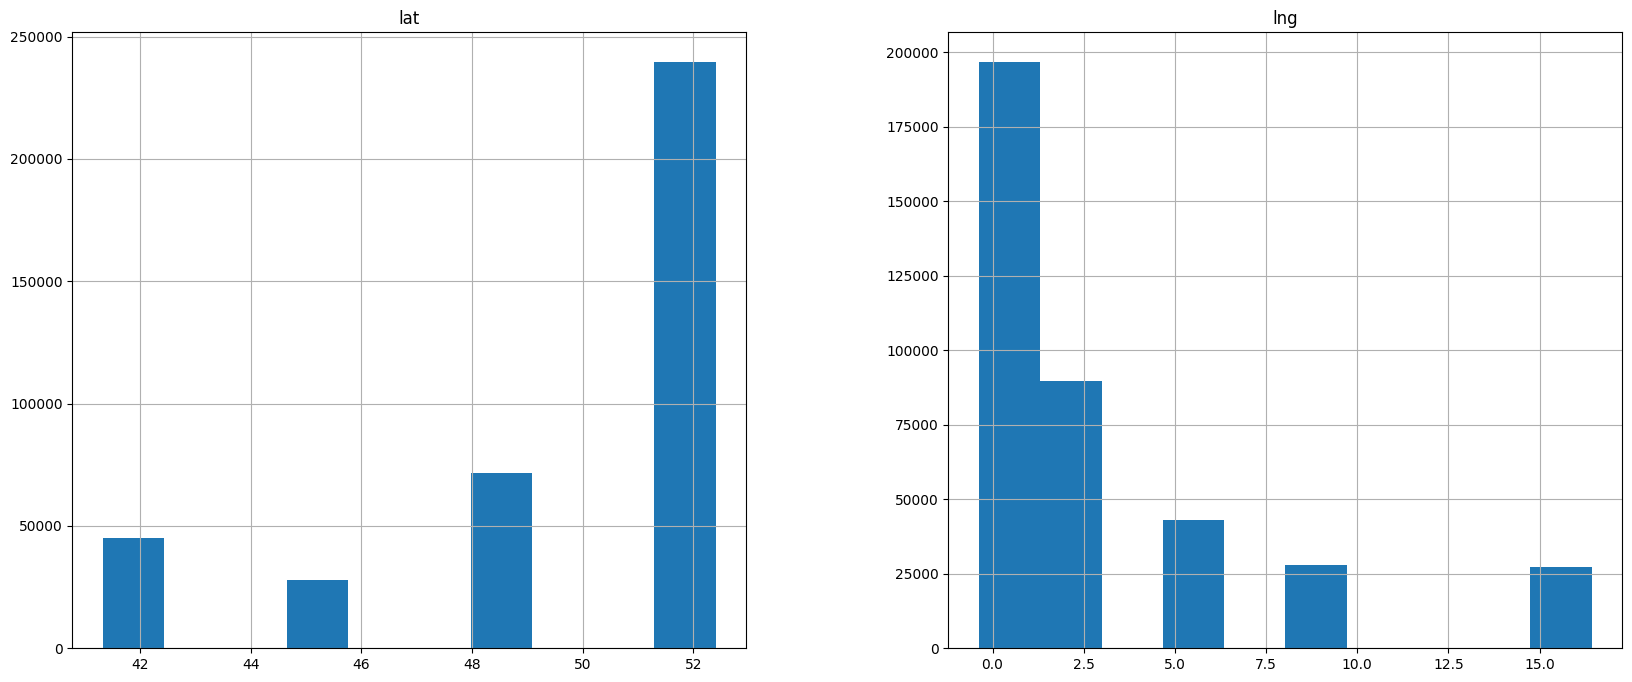

In [58]:
#смотрим на распределение в колонках, в которых есть пропуски
cols = ['lat', 'lng']
data_for_model[cols].hist(figsize=(20, 8));

В колонке lat распределение не похоже ни на нормальное, ни на логнормальное. Заменим пропуски модой.

В колонке lng распределение похоже на логнормальное. Заменим пропуски медианой.

In [127]:
# Заполним пропуски в колонках модой и медианой, как написано выше.
data_for_model['lat'] = data_for_model['lat'].fillna(data_for_model['lat'].mode()[0])
data_for_model['lng'] = data_for_model['lng'].fillna(data_for_model['lng'].median())

data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int64  
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

<Axes: >

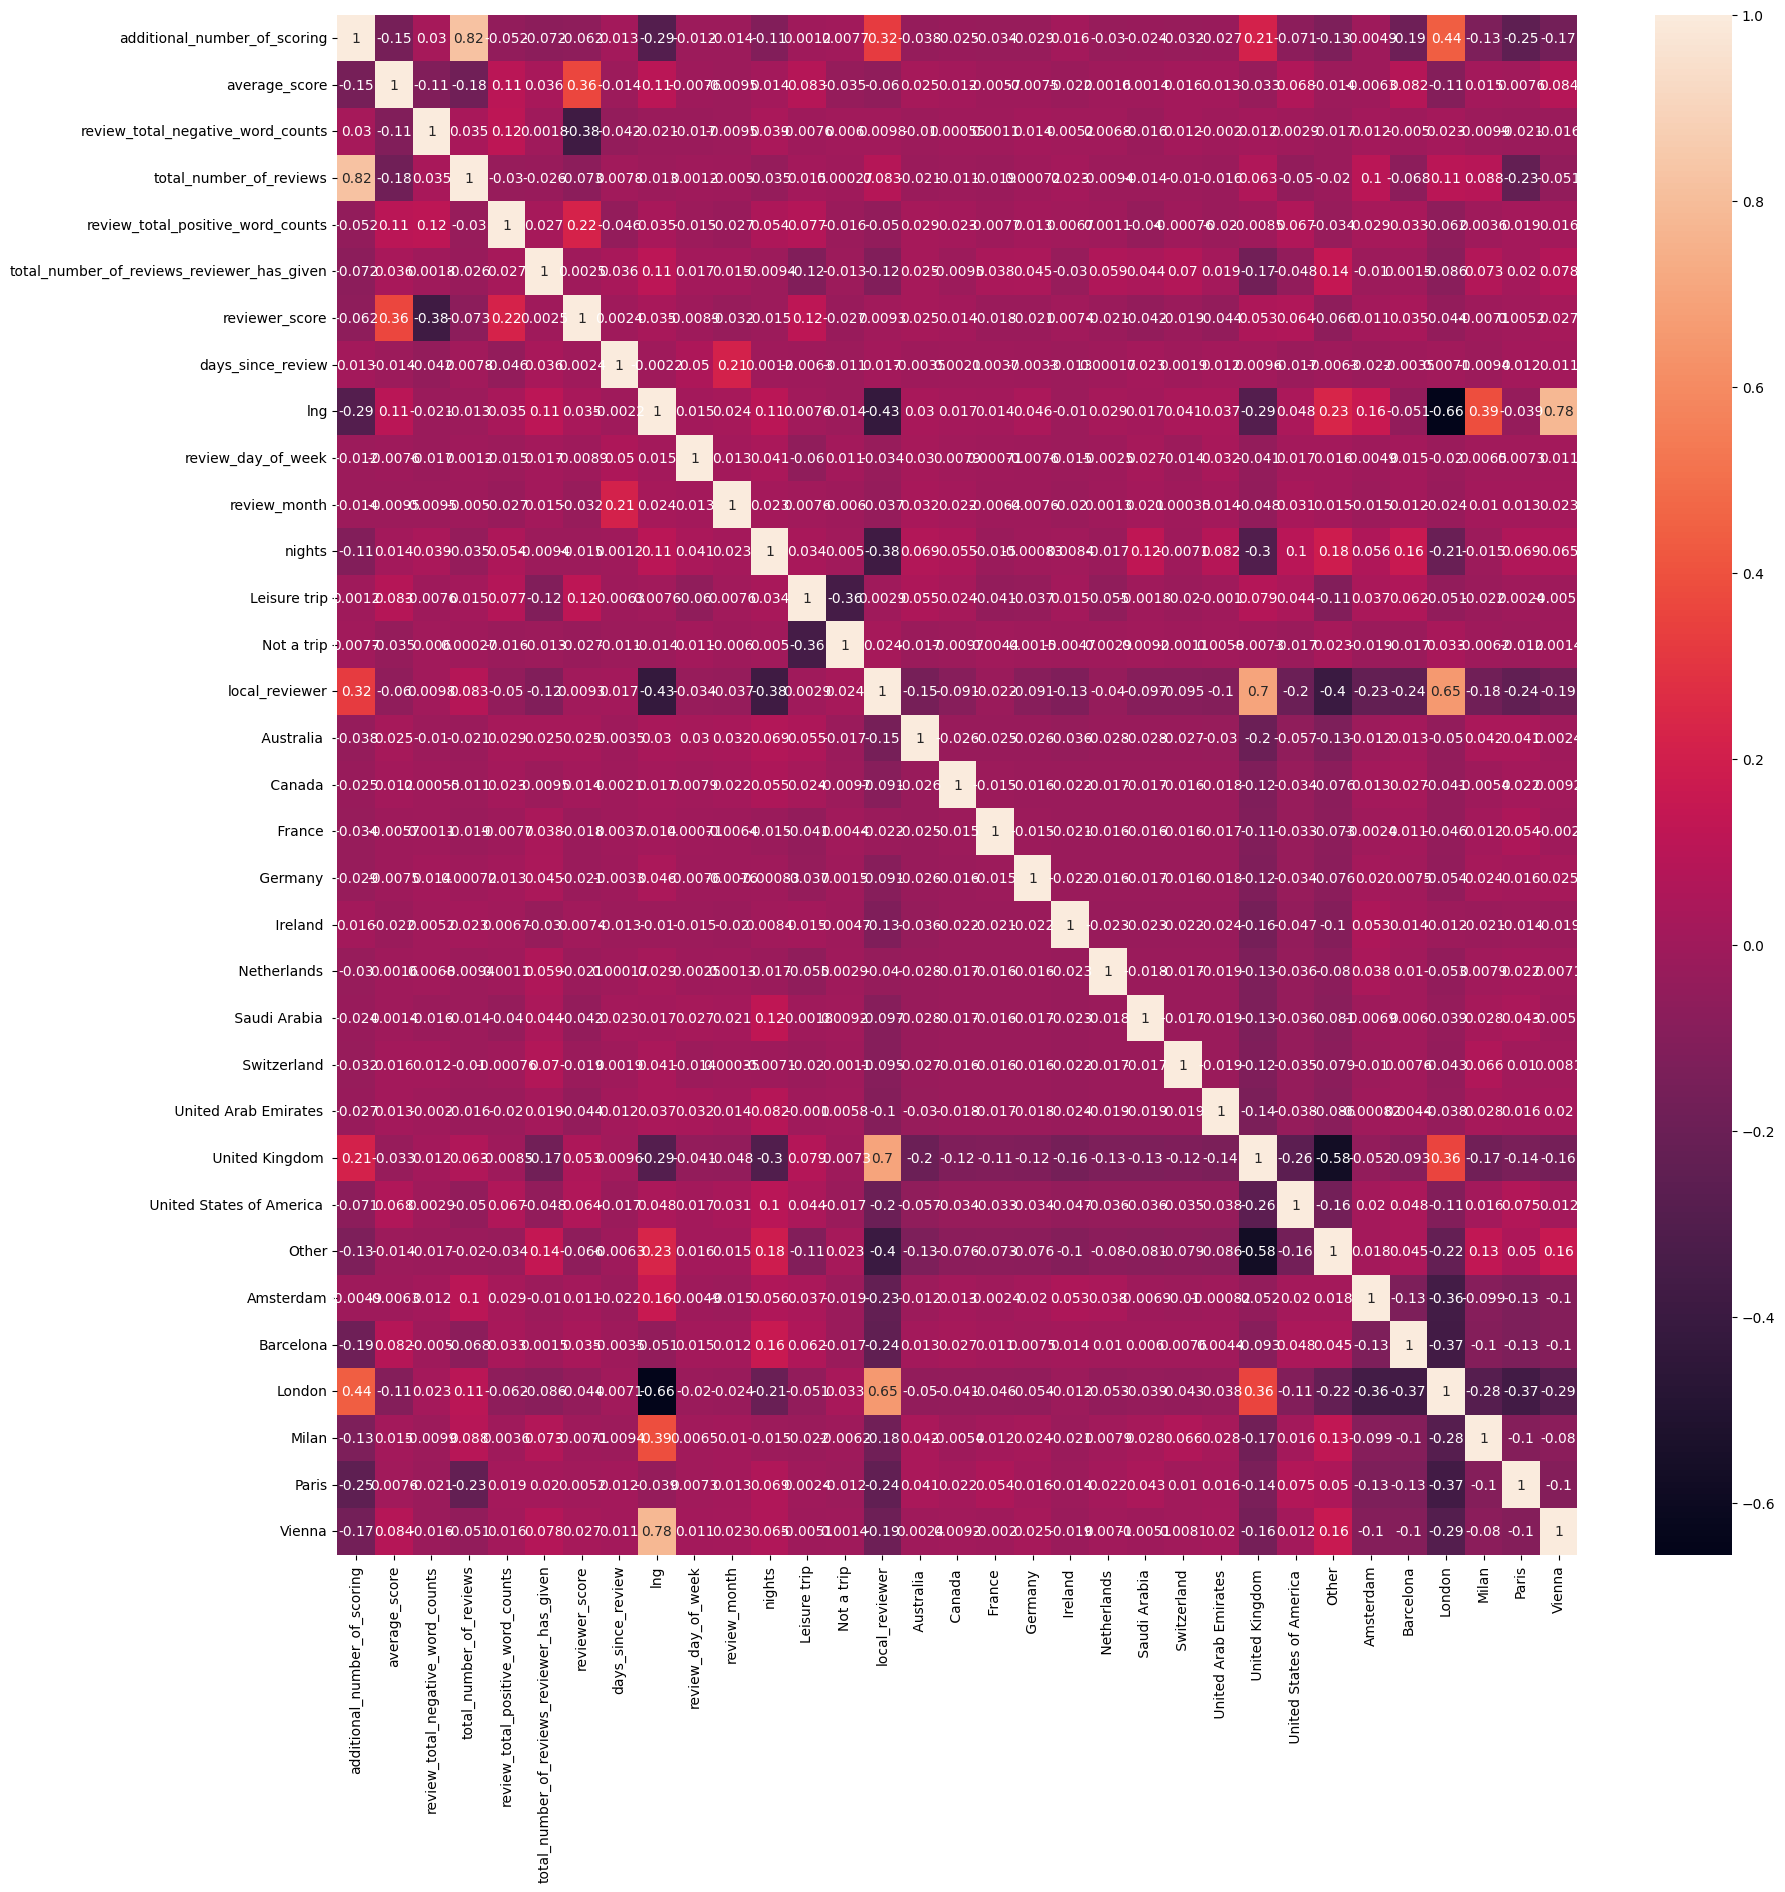

In [129]:
#Удаляем колонку с адресом
data_for_model = data_for_model.drop(['lat', 'Business trip'], axis = 1)
data_for_model.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lng,review_day_of_week,review_month,nights,Leisure trip,Not a trip,local_reviewer,Australia,Canada,France,Germany,Ireland,Netherlands,Saudi Arabia,Switzerland,United Arab Emirates,United Kingdom,United States of America,Other,Amsterdam,Barcelona,London,Milan,Paris,Vienna
0,581,8.4,3,1994,4,7,10.0,531,-0.143671,4,2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,299,8.3,3,1361,2,14,6.3,203,-0.123097,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,32,8.9,6,406,0,14,7.5,289,2.325643,1,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,34,7.5,0,607,11,8,10.0,681,2.394540,1,9,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,914,8.5,4,7586,20,10,9.6,516,4.847060,5,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [136]:
data_for_model = data_for_model.drop(['lng'], axis = 1)
data_for_model.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,review_day_of_week,review_month,nights,Leisure trip,Not a trip,local_reviewer,Australia,Canada,France,Germany,Ireland,Netherlands,Saudi Arabia,Switzerland,United Arab Emirates,United Kingdom,United States of America,Other,Amsterdam,Barcelona,London,Milan,Paris,Vienna
0,581,8.4,3,1994,4,7,10.0,531,4,2,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,299,8.3,3,1361,2,14,6.3,203,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,32,8.9,6,406,0,14,7.5,289,1,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,34,7.5,0,607,11,8,10.0,681,1,9,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,914,8.5,4,7586,20,10,9.6,516,5,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [137]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = data_for_model.drop(['reviewer_score'], axis = 1)  
y = data_for_model['reviewer_score'] 

<Axes: >

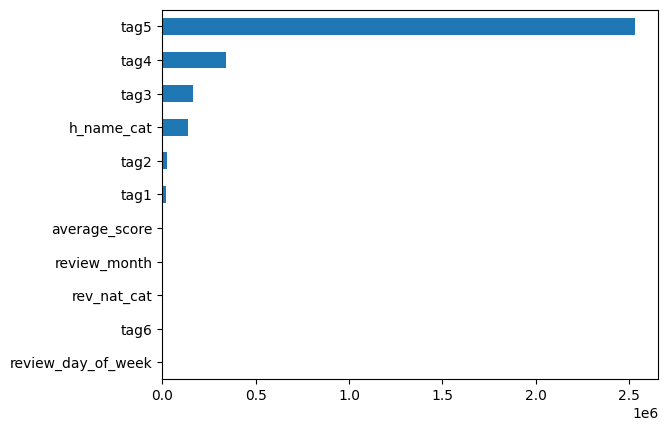

In [63]:
y1=y.astype('int')


from sklearn.feature_selection import chi2 # хи-квадрат

cat_cols = ['average_score', 'tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'h_name_cat', 'rev_nat_cat', 'review_day_of_week', 'review_month']

imp_cat = pd.Series(chi2(X[cat_cols], y1)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')


<Axes: >

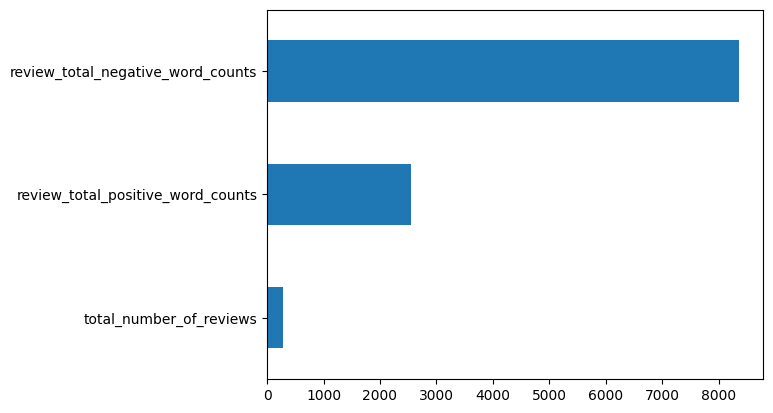

In [64]:
from sklearn.feature_selection import f_classif # anova

num_cols = ['review_total_negative_word_counts', 'review_total_positive_word_counts', 'total_number_of_reviews']

imp_num = pd.Series(f_classif(X[num_cols], y1)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [132]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [138]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [139]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [140]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# Если заполнять пропуски в числовых колонках средним значением, получим MAPE = 0.1414308955470473
# Если заполнять пропуски в числовых колонках медианным значением, получим MAPE = 0.14129333854933662, что немного лучше 
# Если заполнять пропуски в числовых колонках модой, получим MAPE = 0.14136866314752133, что хуже, чем при заполнении пропусков медианным значением
# Если заполнять пропуски в числовых колонках нулями, получим MAPE = 0.14133388538621802, что хуже, чем при заполнении пропусков медианным значением
# Если заполнять пропуски медианным значением и добавить числовой признак "день после отзыва", получим MAPE = 0.138043910434435

MAPE: 0.13561121626641892


Небольшой бонус:


In [10]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)